# Fine Tune Stable Diffusion

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Using custom data configuration lambdalabs--pokemon-blip-captions-10e3527a764857bd
Found cached dataset parquet (/home/ubuntu/.cache/huggingface/datasets/lambdalabs___parquet/lambdalabs--pokemon-blip-captions-10e3527a764857bd/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


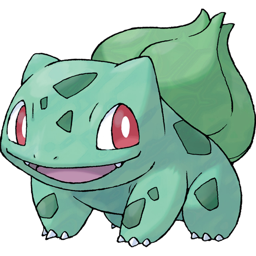

a drawing of a green pokemon with red eyes


In [1]:
# Check the dataset
from datasets import load_dataset
ds = load_dataset("lambdalabs/pokemon-blip-captions", split="train")
sample = ds[0]
display(sample["image"].resize((256, 256)))
print(sample["text"])

In [ ]:
from huggingface_hub import hf_hub_download
ckpt_path = hf_hub_download(repo_id="CompVis/stable-diffusion-v-1-4-original", filename="sd-v1-4-full-ema.ckpt", use_auth_token=True)

In [1]:
import torch
from diffusers import StableDiffusionPipeline
from torch import autocast

pipe = StableDiffusionPipeline.from_pretrained("lambdalabs/sd-pokemon-diffusers", torch_dtype=torch.float32)  
pipe = pipe.to("cuda")

prompt = "Darth Vader"
scale = 10
n_samples = 4

# Sometimes the nsfw checker is confused by the Pokémon images, you can disable
# it at your own risk here
disable_safety = False

if disable_safety:
  def null_safety(images, **kwargs):
      return images, False
  pipe.safety_checker = null_safety

with autocast("cuda"):
  images = pipe(n_samples*[prompt], guidance_scale=scale).images

for idx, im in enumerate(images):
  im.save(f"{idx:06}.png")

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/279 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [2]:
from datasets import load_dataset

# Dataset to download
dataset_id = "pcuenq/oxford-pets" # CHANGE THIS TO YOUR {hub_username}/{dataset_id}
# Load the image dataset
dataset = load_dataset(dataset_id, split="train", )
# Sanity check
dataset

Using custom data configuration pcuenq--oxford-pets-43375e644eed3d52


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/7390 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /home/ubuntu/.cache/huggingface/datasets/pcuenq___parquet/pcuenq--oxford-pets-43375e644eed3d52/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'label', 'dog', 'image'],
    num_rows: 7390
})

In [3]:
list(set(dataset['label']))

['Siamese',
 'Maine Coon',
 'saint bernard',
 'shiba inu',
 'Persian',
 'japanese chin',
 'Bombay',
 'american pit bull terrier',
 'beagle',
 'samoyed',
 'British Shorthair',
 'leonberger',
 'Sphynx',
 'Ragdoll',
 'american bulldog',
 'keeshond',
 'Egyptian Mau',
 'pug',
 'scottish terrier',
 'newfoundland',
 'english setter',
 'english cocker spaniel',
 'havanese',
 'Bengal',
 'miniature pinscher',
 'Russian Blue',
 'Birman',
 'Abyssinian',
 'chihuahua',
 'boxer',
 'wheaten terrier',
 'great pyrenees',
 'yorkshire terrier',
 'basset hound',
 'german shorthaired',
 'pomeranian',
 'staffordshire bull terrier']

In [17]:
# Define a function to filter examples by label
def filter_by_label(example):
    return example['label'] == "keeshond"

# Use the filter function to get only examples with label "chihuahua"
filtered_dataset = dataset.filter(filter_by_label)

  0%|          | 0/8 [00:00<?, ?ba/s]

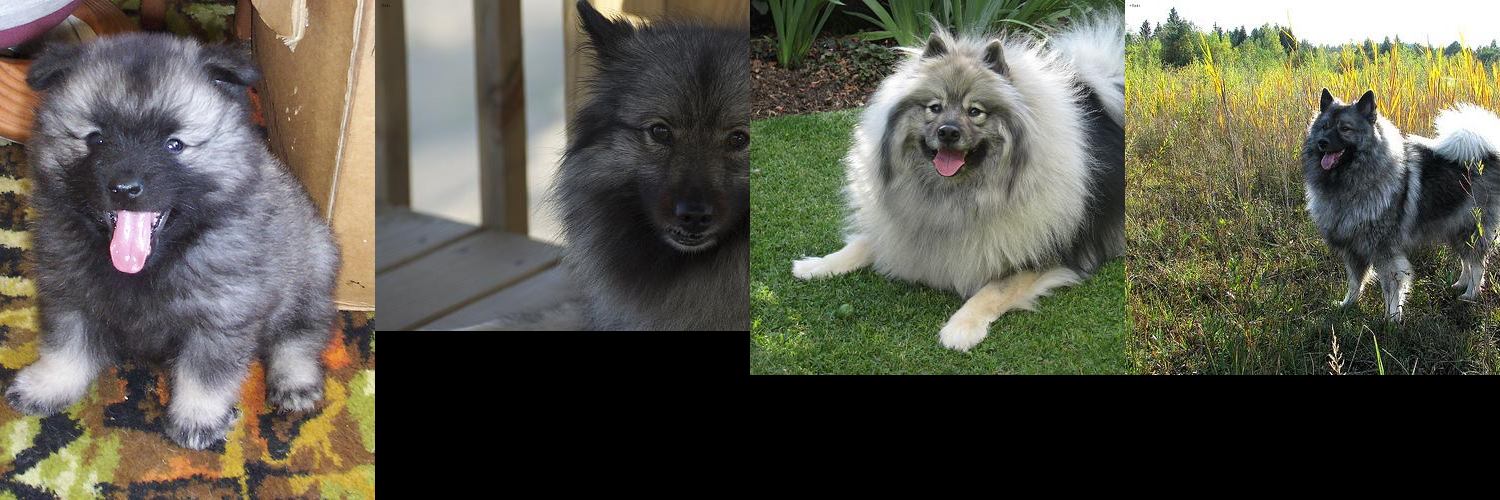

In [18]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

num_samples = 4
image_grid(filtered_dataset["image"][:num_samples], rows=1, cols=num_samples)

In [6]:
# save train images
for idx, im in enumerate(filtered_dataset['image'][3:7]):
  im.save(f"{idx:06}.png")

In [19]:
name_of_your_concept = "keeshond"  # CHANGE THIS ACCORDING TO YOUR SUBJECT
type_of_thing = "dog"  # CHANGE THIS ACCORDING TO YOUR SUBJECT
instance_prompt = f"a photo of {name_of_your_concept} {type_of_thing}"
print(f"Instance prompt: {instance_prompt}")

Instance prompt: a photo of keeshond dog


In [20]:
from torch.utils.data import Dataset
from torchvision import transforms

tokenizer = pipe.tokenizer

class DreamBoothDataset(Dataset):
    def __init__(self, dataset, instance_prompt, tokenizer, size=512):
        self.dataset = dataset
        self.instance_prompt = instance_prompt
        self.tokenizer = tokenizer
        self.size = size
        self.transforms = transforms.Compose(
            [
                transforms.Resize(size),
                transforms.CenterCrop(size),
                transforms.ToTensor(),
                transforms.Normalize([0.5], [0.5]),
            ]
        )

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        example = {}
        image = self.dataset[index]["image"]
        example["instance_images"] = self.transforms(image)
        example["instance_prompt_ids"] = self.tokenizer(
            self.instance_prompt,
            padding="do_not_pad",
            truncation=True,
            max_length=self.tokenizer.model_max_length,
        ).input_ids
        example["instance_images"] = example["instance_images"].type(torch.FloatTensor)
        return example

In [21]:
train_dataset = DreamBoothDataset(filtered_dataset, instance_prompt, tokenizer)
    
train_dataset[20]['instance_images']

tensor([[[-0.8275, -0.8275, -0.8196,  ..., -0.4353, -0.4275, -0.4039],
         [-0.8275, -0.8275, -0.8196,  ..., -0.4431, -0.4431, -0.4196],
         [-0.8275, -0.8275, -0.8196,  ..., -0.4431, -0.4588, -0.4353],
         ...,
         [ 0.5529,  0.5137,  0.4353,  ...,  0.7020,  0.7176,  0.6706],
         [ 0.5686,  0.4745,  0.4039,  ...,  0.5765,  0.6157,  0.6314],
         [ 0.5608,  0.4196,  0.3804,  ...,  0.4275,  0.4431,  0.5843]],

        [[-0.7804, -0.7804, -0.7725,  ..., -0.5059, -0.4902, -0.4667],
         [-0.7804, -0.7804, -0.7725,  ..., -0.5059, -0.5059, -0.4824],
         [-0.7804, -0.7804, -0.7725,  ..., -0.5059, -0.5216, -0.4980],
         ...,
         [ 0.5059,  0.4667,  0.3804,  ...,  0.6784,  0.6784,  0.6314],
         [ 0.5216,  0.4275,  0.3490,  ...,  0.5608,  0.5765,  0.6000],
         [ 0.5137,  0.3725,  0.3255,  ...,  0.4118,  0.4196,  0.5608]],

        [[-0.8902, -0.8902, -0.8667,  ..., -0.6471, -0.6392, -0.6157],
         [-0.8902, -0.8902, -0.8667,  ..., -0

Now that we have a training dataset, the next thing we need is to define a _data collator_. A data collator is a function that collects elements in a batch of data and applies some logic to form a single tensor we can provide to the model.

For DreamBooth, our data collator need to provide the model with the input IDs from the tokenizer and the pixel values from the images as a stacked tensor. The function below does the trick:

In [22]:
import torch

def collate_fn(examples):
    input_ids = [example["instance_prompt_ids"] for example in examples]
    pixel_values = [example["instance_images"] for example in examples]
    pixel_values = torch.stack(pixel_values)
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()

    input_ids = tokenizer.pad(
        {"input_ids": input_ids}, padding=True, return_tensors="pt"
    ).input_ids
    
    batch = {
        "input_ids": input_ids,
        "pixel_values": pixel_values,
    }
    return batch

## Load the components of the Stable Diffusion pipeline

In [23]:
text_encoder = pipe.text_encoder
vae = pipe.vae
unet = pipe.unet
feature_extractor = pipe.feature_extractor

In [24]:
## Let's fine-tune the model
learning_rate = 3e-06
max_train_steps = 209

Next, let's wrap the other hyperparameters we need in a `Namespace` object to make it easier to configure the training run:

In [25]:
from argparse import Namespace

model_id = "lambdalabs/sd-pokemon-diffusers"

args = Namespace(
    pretrained_model_name_or_path=model_id,
    resolution=512, # Reduce this if you want to save some memory
    train_dataset=train_dataset,
    instance_prompt=instance_prompt,
    learning_rate=learning_rate,
    max_train_steps=max_train_steps,
    train_batch_size=1,
    gradient_accumulation_steps=1, # Increase this if you want to lower memory usage
    max_grad_norm=1.0,
    gradient_checkpointing=True,  # set this to True to lower the memory usage.
    use_8bit_adam=True,  # use 8bit optimizer from bitsandbytes
    seed=3434554,
    sample_batch_size=2,
    output_dir="my-dreambooth",  # where to save the pipeline
)

In [26]:
import math

import torch.nn.functional as F
from accelerate import Accelerator
from accelerate.utils import set_seed
from diffusers import DDPMScheduler, PNDMScheduler, StableDiffusionPipeline, DDIMScheduler
from diffusers.pipelines.stable_diffusion import StableDiffusionSafetyChecker
from torch.utils.data import DataLoader
from tqdm.auto import tqdm


def training_function(text_encoder, vae, unet):

    accelerator = Accelerator(
        gradient_accumulation_steps=args.gradient_accumulation_steps,
    )

    set_seed(args.seed)

    # if args.gradient_checkpointing:
    #     unet.enable_gradient_checkpointing()

    # # # Use 8-bit Adam for lower memory usage or to fine-tune the model in 16GB GPUs
    # if args.use_8bit_adam:
    #     import bitsandbytes as bnb
    #     optimizer_class = bnb.optim.AdamW8bit
    # else:
    optimizer_class = torch.optim.AdamW

    optimizer = optimizer_class(
        unet.parameters(),  # only optimize unet
        lr=args.learning_rate,
    )

    noise_scheduler = DDIMScheduler(
        beta_start=0.00085,
        beta_end=0.012,
        beta_schedule="linear",
        num_train_timesteps=1000,
    )

    train_dataloader = DataLoader(
        args.train_dataset,
        batch_size=args.train_batch_size,
        shuffle=True,
        collate_fn=collate_fn,
    )

    unet, optimizer, train_dataloader = accelerator.prepare(
        unet, optimizer, train_dataloader
    )

    # Move text_encode and vae to gpu
    text_encoder.to(accelerator.device)
    vae.type(torch.FloatTensor)
    vae.to(accelerator.device)
    

    # We need to recalculate our total training steps as the size of the training dataloader may have changed.
    num_update_steps_per_epoch = math.ceil(
        len(train_dataloader) / args.gradient_accumulation_steps
    )
    num_train_epochs = math.ceil(args.max_train_steps / num_update_steps_per_epoch)

    # Train!
    total_batch_size = (
        args.train_batch_size
        * accelerator.num_processes
        * args.gradient_accumulation_steps
    )
    # Only show the progress bar once on each machine.
    progress_bar = tqdm(
        range(args.max_train_steps), disable=not accelerator.is_local_main_process
    )
    progress_bar.set_description("Steps")
    global_step = 0

    for epoch in range(num_train_epochs):
        unet.train()
        for step, batch in enumerate(train_dataloader):
            with accelerator.accumulate(unet):
                # Convert images to latent space
                with torch.no_grad():
                    latents = vae.encode(batch["pixel_values"]).latent_dist.sample()
                    latents = latents * 0.18215

                # Sample noise that we'll add to the latents
                noise = torch.randn(latents.shape).to(latents.device)
                bsz = latents.shape[0]
                # Sample a random timestep for each image
                timesteps = torch.randint(
                    0,
                    noise_scheduler.config.num_train_timesteps,
                    (bsz,),
                    device=latents.device,
                ).long()

                # Add noise to the latents according to the noise magnitude at each timestep
                # (this is the forward diffusion process)
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Get the text embedding for conditioning
                with torch.no_grad():
                    encoder_hidden_states = text_encoder(batch["input_ids"])[0]

                # Predict the noise residual
                noise_pred = unet(
                    noisy_latents, timesteps, encoder_hidden_states
                ).sample
                loss = (
                    F.mse_loss(noise_pred, noise, reduction="none")
                    .mean([1, 2, 3])
                    .mean()
                )

                accelerator.backward(loss)
                if accelerator.sync_gradients:
                    accelerator.clip_grad_norm_(unet.parameters(), args.max_grad_norm)
                optimizer.step()
                optimizer.zero_grad()

            # Checks if the accelerator has performed an optimization step behind the scenes
            if accelerator.sync_gradients:
                progress_bar.update(1)
                global_step += 1

            logs = {"loss": loss.detach().item()}
            progress_bar.set_postfix(**logs)

            if global_step >= args.max_train_steps:
                break

        accelerator.wait_for_everyone()

    # Create the pipeline using using the trained modules and save it.
    if accelerator.is_main_process:
        print(f"Loading pipeline and saving to {args.output_dir}...")
        scheduler = PNDMScheduler(
            beta_start=0.00085,
            beta_end=0.012,
            beta_schedule="scaled_linear",
            skip_prk_steps=True,
            steps_offset=1,
        )
        pipeline = StableDiffusionPipeline(
            text_encoder=text_encoder,
            vae=vae,
            unet=accelerator.unwrap_model(unet),
            tokenizer=tokenizer,
            scheduler=scheduler,
            safety_checker=StableDiffusionSafetyChecker.from_pretrained(
                "CompVis/stable-diffusion-safety-checker"
            ),
            feature_extractor=feature_extractor,
        )
        pipeline.save_pretrained(args.output_dir)

In [27]:
from accelerate import notebook_launcher

num_of_gpus = 1  # CHANGE THIS TO MATCH THE NUMBER OF GPUS YOU HAVE
notebook_launcher(
    training_function, args=(text_encoder, vae, unet), num_processes=num_of_gpus
)

Launching training on one GPU.


  0%|          | 0/209 [00:00<?, ?it/s]

Loading pipeline and saving to my-dreambooth...


Downloading:   0%|          | 0.00/4.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Now that we've trained the model, let's generate some images with it to see how it fares! First we'll load the pipeline from the output directory we save the model to:

In [28]:
pipe = StableDiffusionPipeline.from_pretrained(
    args.output_dir,
    torch_dtype=torch.float32,
).to("cuda")

In [ ]:
# pipe.save_pretrained(
#     save_directory='output_directory'
# )

Next, let's generate a few images. The `prompt` variable will later be used to set the default on the Hugging Face Hub widget, so experiment a bit to find a good one. You might also want to try creating elaborate prompts with [CLIP Interrogator](https://huggingface.co/spaces/pharma/CLIP-Interrogator):

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

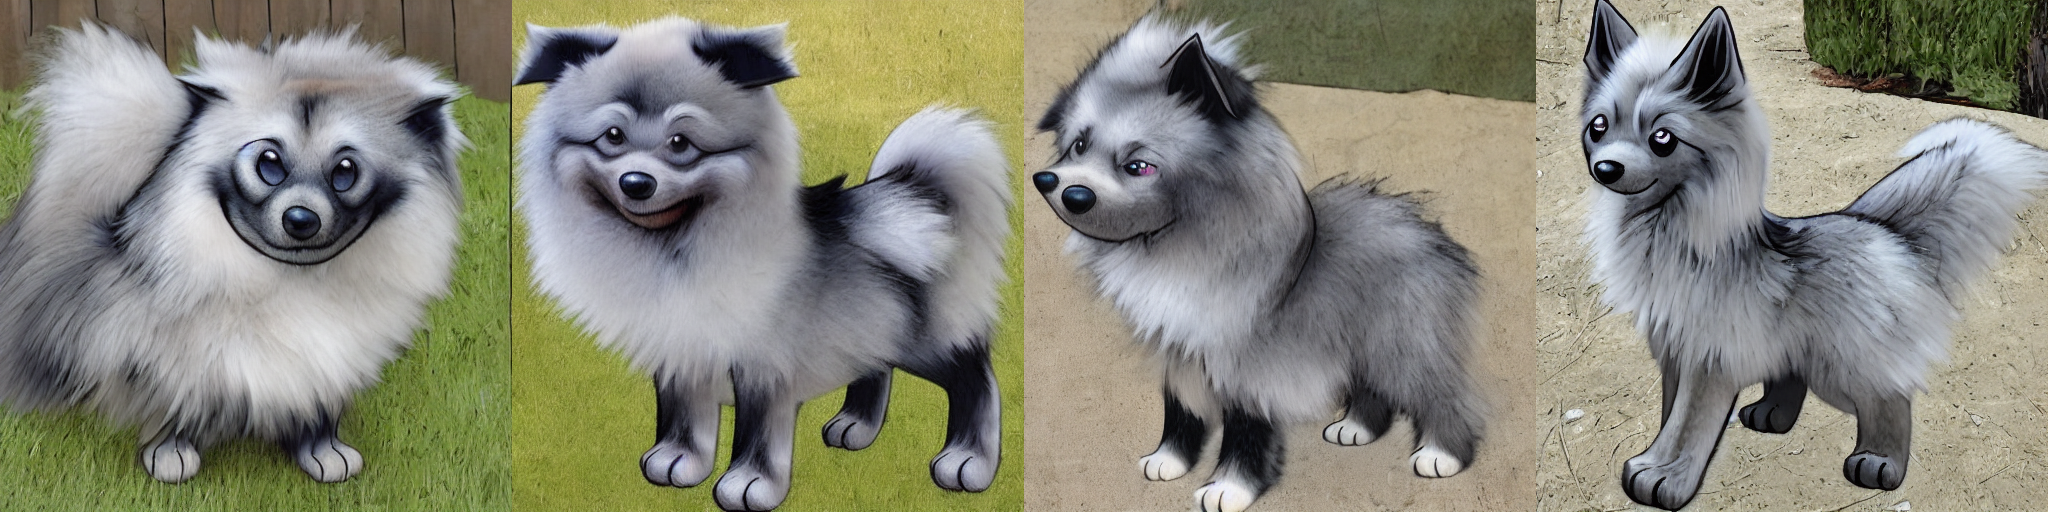

In [32]:
# Pick a funny prompt here and it will be used as the widget's default 
# when we push to the Hub in the next section
prompt = f"{name_of_your_concept} {type_of_thing}"

# Tune the guidance to control how closely the generations follow the prompt.
# Values between 7-11 usually work best
guidance_scale = 10
num_cols = 4
all_images = []
for _ in range(num_cols):
    images = pipe(prompt, guidance_scale=guidance_scale).images
    all_images.extend(images)

image_grid(all_images, 1, num_cols)

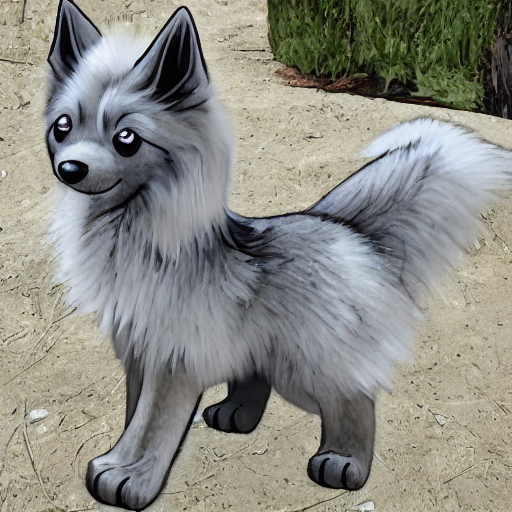

In [41]:
all_images[3]

In [36]:
all_images

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7F8D8938E1C0>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7F8FBC336460>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7F8FBC336A60>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7F8D893F9790>]

In [42]:
from PIL import Image
import io

from concurrent.futures import ThreadPoolExecutor
from PIL import Image
import io

def convert_image_to_jpeg(image):
    # Convert the image to JPEG format
    image = image.convert('RGB')
    # Create an in-memory buffer to store the JPEG data
    buffer = io.BytesIO()
    image.save(buffer, 'JPEG')
    # Create a JPEG image from the in-memory buffer
    jpeg = Image.open(buffer)
    return jpeg

def convert_images_to_jpeg(images):
    with ThreadPoolExecutor() as executor:
        # Convert the images in parallel using the ThreadPoolExecutor
        jpegs = list(executor.map(convert_image_to_jpeg, images))
    return jpegs

# Use in-memory buffer
convert_images_to_jpeg(all_images)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F8D893EBD90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F8D893EB280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F8FBC336BE0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F8D893F13A0>]

In [7]:
import os
directory = "output_images"
files = os.scandir(directory)
jpeg_files = [os.path.join(directory, f.name) for f in files if f.name.lower().endswith('.jpg') or f.name.lower().endswith('.jpeg')]
jpeg_files

['output_images/004_3e-06_209_10_dog.jpg',
 'output_images/000_3e-06_209_10_dog.jpg',
 'output_images/003_3e-06_209_10_dog.jpg',
 'output_images/001_3e-06_209_10_dog.jpg',
 'output_images/002_3e-06_209_10_dog.jpg']

In [ ]:
def convert_image_to_jpeg(image_path):
    # Open the image file
    image = Image.open(image_path)
    # Convert the image to JPEG format
    image = image.convert('RGB')
    # Create an in-memory buffer to store the JPEG data
    buffer = io.BytesIO()
    image.save(buffer, 'JPEG')
    # Create a JPEG image from the in-memory buffer
    jpeg = Image.open(buffer)
    # Save the JPEG image to disk
    jpeg_path = os.path.splitext(image_path)[0] + '.jpg'
    jpeg.save(jpeg_path)
    return jpeg_path

conver_image_to